PREDICTING RED AND WHITE WINE QUALITY

Wine has been around for a really long time, almost about 5,000 BC. Have we ever thought why it's been around for so long. Because of it is easy to make process of simply yeast eating the natural fermentable sugars in grape juice to give its main product alcohol. Any fruit juice with fermentable sugars can make wine but grapes being higher on the fruit evolutionary ladder on fermentable sugar content we choose grapes for making wine.

Wine market is huge in US. Accroding to the statistical atudy, the wine sale for this year is estimated to be 39.8 billion dollars in US and 60 billion dollars around the globe. With these huge cashflowing business, companies are always willing to use technologies to leviate their business to next level and to think about what is next. With the remarkable power of Data Science, Machine Learning and Analytics, the company can make use of their data to stay ahead of their competition. It helps the exective, directors, mangers to understand their business and change statergy, make decision using a data driven approach. PROBLEM STATEMENT:

Wine dataset contains many useful information with different forteen columns.This dataset contains important role in defining taste and quality of wine.I'll analyse the dataset to understand the factors responsible for wine quality. First 11 are input variables whereas next 3 are ouptut variables:quality,good and color.

DESCRIPTION OF ATTRIBUTES:

1 - fixed acidity: most acids involved with wine or fixed or nonvolatile.

2 - volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant or sour taste.

3 - citric acid:It is found in small quantities, citric acid can add ‘freshness’ and flavor to wines.

4 - residual sugar: the amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/litre and wines with greater than 45 grams/liter are considered sweet.

5 - chlorides: the amount of salt in the wine.

6 - free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.

7 - total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

8 - density: the density of water is close to that of water depending on the percent alcohol and sugar content

9 - pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

10 - sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

11 - alcohol: the percent alcohol content of the wine

12- quality:It tells us the quality of wines rating from 0(very bad) to 10(very good).

13- good:It tells us about goodness of the wine.The goodness of the wine is depending upon the quality of it.If quality of wine is below or equal to 6 then goodness is zero(bad) otherwise it is one(good).

14- color:It tells us about the color of the wine i.e.Red or White.


In [1]:
#Import libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_file, show
from bokeh.layouts import row
from bokeh.io import output_notebook
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
import sklearn
import sklearn.metrics
from sklearn import ensemble
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')
output_notebook()
%matplotlib inline

Loading BokehJS ...

In [4]:
#Loading the dataset using pandas library.
df = pd.read_csv('winequality.csv')
#print first five rows.
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red


In [11]:
# Now, let's check the information about different variables from the dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
good                    6497 non-null int64
color                   6497 non-null object
dtypes: float64(11), int64(2), object(1)
memory usage: 710.7+ KB


In [12]:
#It will describe the whole dataset.
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.196552
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.397421
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [13]:
#It will check for any null value in the dataset.
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
good                    0
color                   0
dtype: int64

In [17]:
#It will rename the column name as per your request
df.rename(columns={'fixed acidity': 'FixedAcidity','citric acid':'CitricAcid','volatile acidity':'VolatileAcidity','residual sugar':'ResidualSugar','free sulfur dioxide':'FreeSulfurDioxide','total sulfur dioxide':'TotalSulfurDioxide'}, inplace=True)
df.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red


In [18]:
#It will print unique values of quality in dataset.
df['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

In [20]:
#it will print count of quality in ascending order.
df.quality.value_counts().sort_index()

3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64

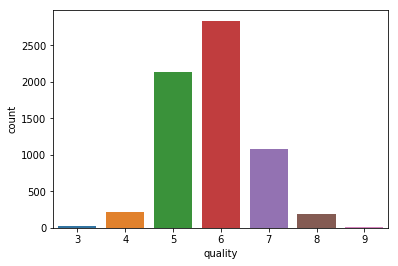

In [22]:
#Here we are checking the quality of wine where .e. bad: 1-4
      #average: 5-6
      #good: 7-8
sns.countplot(x='quality', data=df)

In [23]:
conditions = [
    (df['quality'] >= 7),
    (df['quality'] <= 4)
]
rating = ['good', 'bad']
df['rating'] = np.select(conditions, rating, default='average')
df.rating.value_counts()

average    4974
good       1277
bad         246
Name: rating, dtype: int64

In [24]:
df.groupby('rating').mean()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,good
rating,,,,,,,,,,,,,
average,7.241536,0.346423,0.316765,5.659087,0.058674,30.766285,117.744069,0.995113,3.215346,0.529908,10.265275,5.570165,0.0
bad,7.357724,0.465163,0.273374,4.273984,0.062126,22.902439,105.701220,0.994944,3.234797,0.505732,10.184350,3.878049,0.0
good,7.085709,0.289170,0.334628,4.827721,0.044576,31.055208,109.891151,0.993027,3.227651,0.541488,11.433359,7.158966,1.0



Corelation between features/variables:

    Let's check the corelation between the target variable and predictor variables,



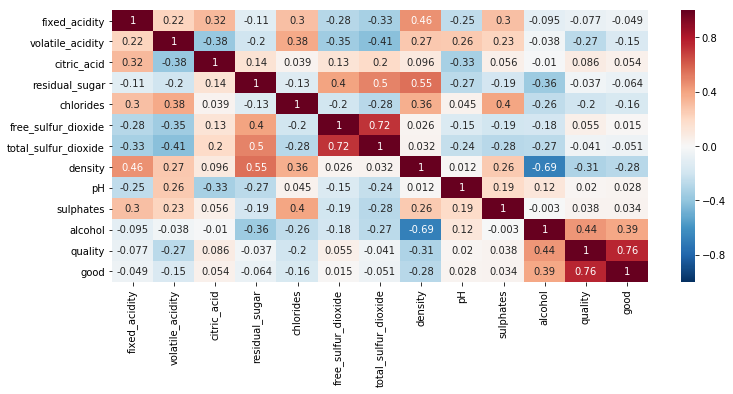

In [25]:
correlation = df.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [26]:
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
good                    0.759360
alcohol                 0.444319
citric_acid             0.085532
free_sulfur_dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual_sugar         -0.036980
total_sulfur_dioxide   -0.041385
fixed_acidity          -0.076743
chlorides              -0.200666
volatile_acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64



    We can observe that, the 'alcohol, sulphates, citric_acid & fixed_acidity' have maximum corelation with response variable 'quality'.
    This means that, they need to be further analysed for detailed pattern and corelation exploration. Hence, we will use only these 4 variables in our future analysis.




Analysis of alcohol percentage with wine quality:

[Text(0, 0.5, 'Alcohol Percent'),
 Text(0.5, 0, 'Wine Quality'),
 Text(0.5, 1.0, 'Alcohol percent in different wine quality types')]

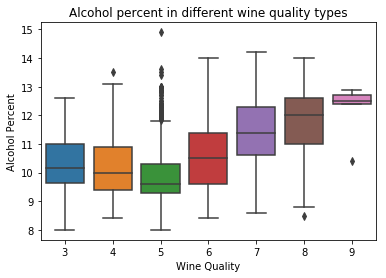

In [27]:
bx = sns.boxplot(x="quality", y='alcohol', data = df)
bx.set(xlabel='Wine Quality', ylabel='Alcohol Percent', title='Alcohol percent in different wine quality types')

Analysis of sulphates & wine ratings:

[Text(0, 0.5, 'Sulphates'),
 Text(0.5, 0, 'Wine Ratings'),
 Text(0.5, 1.0, 'Sulphates in different types of Wine ratings')]

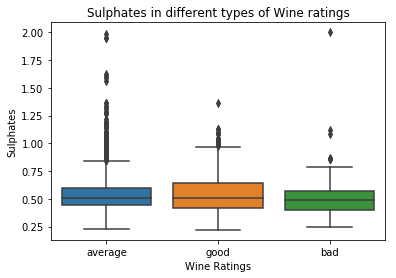

In [28]:
bx = sns.boxplot(x="rating", y='sulphates', data = df)
bx.set(xlabel='Wine Ratings', ylabel='Sulphates', title='Sulphates in different types of Wine ratings')

[Text(0, 0.5, 'Citric Acid'),
 Text(0.5, 0, 'Wine Ratings'),
 Text(0.5, 1.0, 'Citric_acid in different types of Wine ratings')]

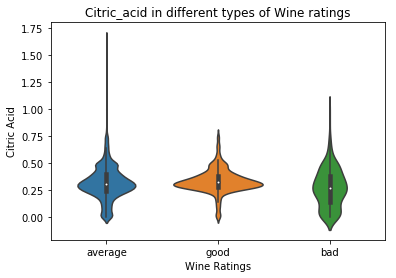

In [54]:
#Analysis of Citric Acid with wine quality.
bx = sns.violinplot(x="rating", y='citric_acid', data = df)
bx.set(xlabel='Wine Ratings', ylabel='Citric Acid', title='Citric_acid in different types of Wine ratings')

[Text(0, 0.5, 'Fixed Acidity'),
 Text(0.5, 0, 'Wine Ratings'),
 Text(0.5, 1.0, 'Fixed Acidity in different types of Wine ratings')]

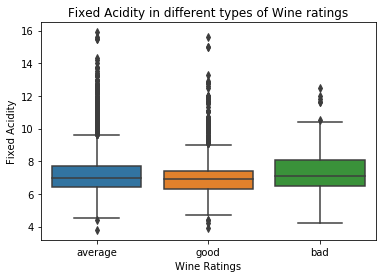

In [30]:
#Analysis of Fixed Acidity with wine quality.
bx = sns.boxplot(x="rating", y='fixed_acidity', data = df)
bx.set(xlabel='Wine Ratings', ylabel='Fixed Acidity', title='Fixed Acidity in different types of Wine ratings')

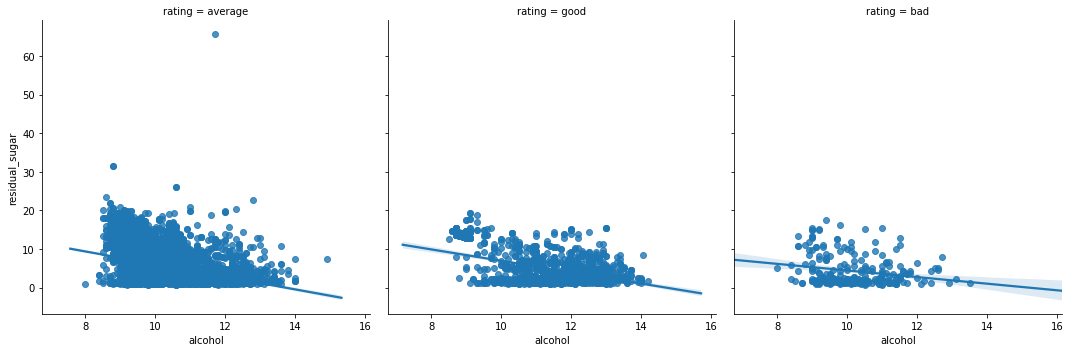

In [39]:
#Linear Regression between alcohol and residual_sugar
sns.lmplot(x = "alcohol", y = "residual_sugar", col = "rating", data = df)



    1.The linear regression plots above for different wine quality ratings (bad, average & good) shows the regression between alcohol and residual sugar content of the red wine.
    We can observe from the trendline that, for good and average wine types the residual sugar content remains almost constant irrespective of alcohol content value. Whereas for bad quality wine, the residual sugar content increases gradually with the increase in alcohol content.
    This analysis can help in manufacturing the good quality wine with continuous monitoring and contrilling the alcohol and residual sugar content of the red wine.



In [41]:
y,X = dmatrices('quality ~ alcohol', data=df, return_type='dataframe')
print("X:", type(X))
print(X.columns)
model=smf.OLS(y, X)
result=model.fit()
result.summary()

X: <class 'pandas.core.frame.DataFrame'>
Index(['Intercept', 'alcohol'], dtype='object')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     1598.
Date:                Thu, 25 Apr 2019   Prob (F-statistic):          1.50e-312
Time:                        10:36:17   Log-Likelihood:                -7623.4
No. Observations:                6497   AIC:                         1.525e+04
Df Residuals:                    6495   BIC:                         1.526e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4053      0.086     27.988      0.000       2.237       2.574
alcohol        0.3253      0.008     39.970      0.000       0.309       0.341
==============================================================================
Omnibus:                      123.922   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.800
Skew:                           0.031   Prob(JB):                     6.34e-57
Kurtosis:                       3.976   Cond. No.                         94.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
model = smf.OLS.from_formula('quality ~ alcohol', data = df)
results = model.fit()
print(results.params)

Intercept    2.405269
alcohol      0.325312
dtype: float64


The above wine quality vs alcohol content regression model's result shows that, the minimum value for quality is 1.87 and there will be increment by single unit for wine quality for every change of 0.360842 alcohol units.

CLASSIFICATION
CLASSIFICATION USING STATS MODEL

In [45]:
#we will use logistic regression for quality greater than 4
df['rate_code'] = (df['quality'] > 4).astype(np.float32)

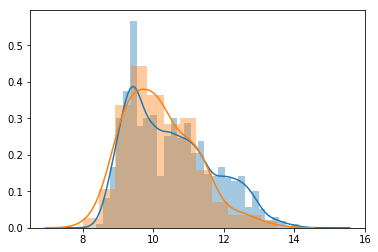

In [59]:

#Here good=1 whereas bad=0
y, X = dmatrices('rate_code ~ alcohol', data = df)
sns.distplot(X[y[:,0] > 0, 1])
sns.distplot(X[y[:,0] == 0, 1])



Here we can predict that quality of wine can be increased if value of alcohol is more than 12%.

In [48]:
model = smf.Logit(y, X)
result = model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.159712
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.009     
Dependent Variable: rate_code        AIC:              2079.3039 
Date:               2019-04-25 10:37 BIC:              2092.8621 
No. Observations:   6497             Log-Likelihood:   -1037.7   
Df Model:           1                LL-Null:          -1046.6   
Df Residuals:       6495             LLR p-value:      2.2633e-05
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-------------------------------------------------------------------
             Coef.    Std.Err.     z      P>|z|     [0.025   0.975]
-------------------------------------------------------------------
Intercept    0.7020     0.6135   1.1442   0.2526   -0.5005   1.9045
alcohol      0.2450     0.0598   4.0943   0.0000    0.1277   0.3623
=================================================================

"""

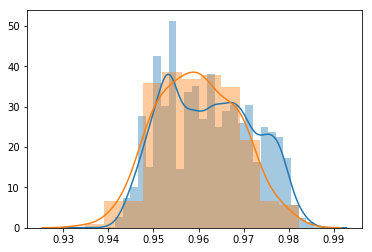

In [49]:
yhat = result.predict(X)
sns.distplot(yhat[y[:,0] > 0])
sns.distplot(yhat[y[:,0] == 0])

In [50]:
yhat = result.predict(X) > 0.955
print(sklearn.metrics.classification_report(y, yhat))

              precision    recall  f1-score   support

         0.0       0.04      0.35      0.07       246
         1.0       0.96      0.68      0.80      6251

   micro avg       0.67      0.67      0.67      6497
   macro avg       0.50      0.51      0.44      6497
weighted avg       0.93      0.67      0.77      6497



Here we can very clearly see the outcomes of red and white quality wines.
Here we can see that precision for good wine quality wine is 96% whereas  for bad is 4% which is not good.
Overall there is 93% average precision


Sklearn's Logistic Regression.

In [52]:
model = sklearn.linear_model.LogisticRegression()
y,X = dmatrices('rate_code ~ alcohol + sulphates + citric_acid + fixed_acidity', data = df)
model.fit(X, y)
yhat = model.predict(X)
print(sklearn.metrics.classification_report(y, yhat))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       246
         1.0       0.96      1.00      0.98      6251

   micro avg       0.96      0.96      0.96      6497
   macro avg       0.48      0.50      0.49      6497
weighted avg       0.93      0.96      0.94      6497



In [53]:
y, X = dmatrices('rate_code ~ alcohol', data = df)
model = sklearn.ensemble.RandomForestClassifier()
model.fit(X, y)
yhat = model.predict(X)
print(sklearn.metrics.classification_report(y, yhat))

              precision    recall  f1-score   support

         0.0       0.75      0.01      0.02       246
         1.0       0.96      1.00      0.98      6251

   micro avg       0.96      0.96      0.96      6497
   macro avg       0.86      0.51      0.50      6497
weighted avg       0.95      0.96      0.94      6497

